# Week 10: GMMs

# Rasika Bhalerao

# Agenda

- Make dataset
- Gaussian Mixture Models

[Thank you to Cornelia Ilin's notebook!](https://github.com/MIDS-W207/cilin-coursework/blob/master/live_sessions/week10/GMM_EM.ipynb)

In [5]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gauss_pdf(data, mean:float, variance:float):
    """ 1-D gaussian distribution equation
    (see formula here: https://en.wikipedia.org/wiki/Normal_distribution)
    # param data: np.array
    # param mean: float point
    # param variance: float point
    # return gauss_pdf: np.array, float points
    """
    s1 = 1/(np.sqrt(2*np.pi*variance))
    s2 = np.exp(-(np.square(data - mean)/(2*variance)))
    
    # compute pdf
    pdf = s1 * s2
    
    return pdf


n_samples = 100
mu1, sigma1 = -4, 1.2
mu2, sigma2 = 0, 1.6 

c1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
c2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)

C = np.array(list(c1) + list(c2))

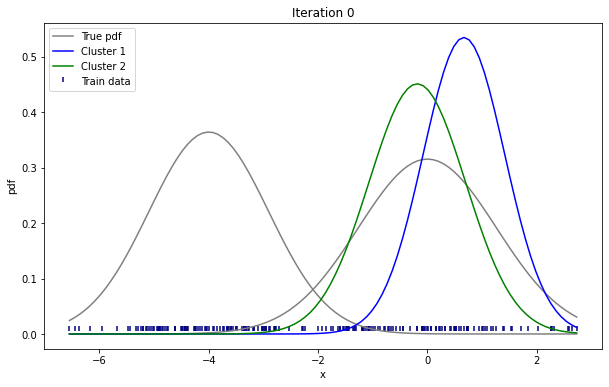

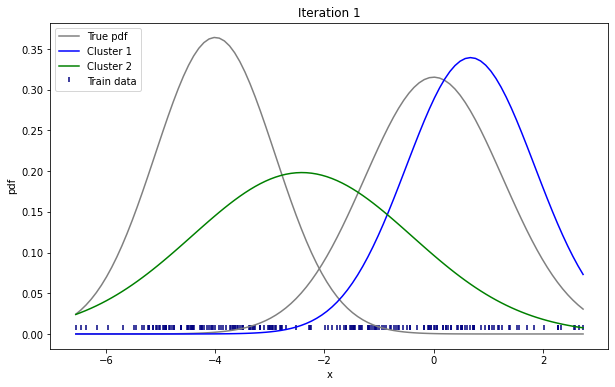

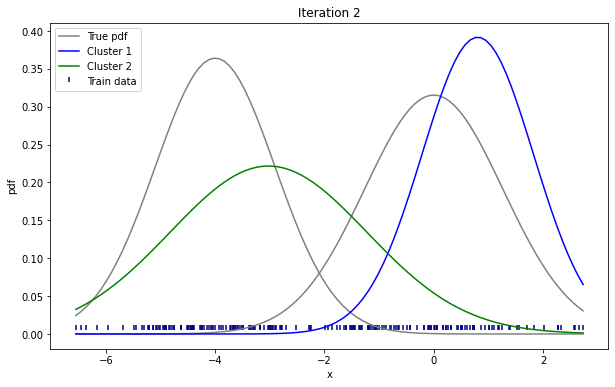

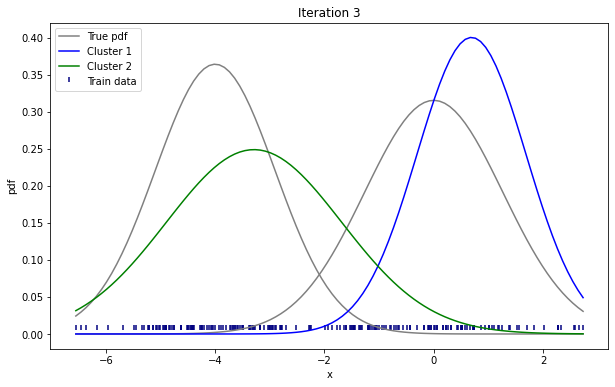

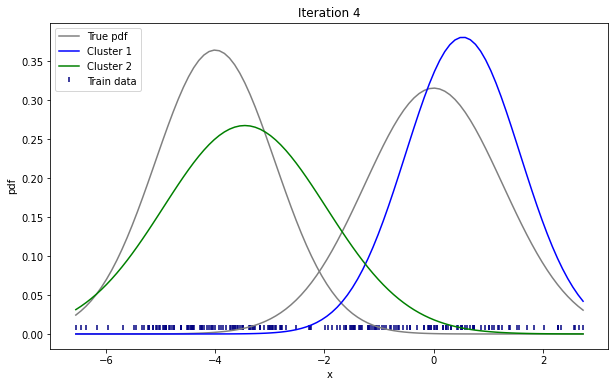

In [6]:
k = 2
weights = np.ones((k)) / k
means = np.random.choice(C, k)
variances = np.random.random_sample(size=k)
eps=1e-8
bins = np.linspace(np.min(C), np.max(C), 100)

for iteration in range(5):
    
    if iteration % 1 == 0:
        plt.figure(figsize=(10,6))

        
        # plot C data
        plt.title("Iteration {}".format(iteration))
        plt.scatter(C, [0.005] * len(C), color='navy', s=30, marker=2, label="Train data")
        
        # plot true pdf
        plt.plot(bins, gauss_pdf(bins, mu1, sigma1), color='grey', label="True pdf")
        plt.plot(bins, gauss_pdf(bins, mu2, sigma2), color='grey')
        
        # plot estimated pdf
        plt.plot(bins, gauss_pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
        plt.plot(bins, gauss_pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")
        
        # add labels and legend
        plt.xlabel("x")
        plt.ylabel("pdf")
        plt.legend(loc='upper left')
  
    ## the Expectation step
    # calculate the likelihood of each observation ci
    likelihood = []
  
    for j in range(k):
        likelihood.append(gauss_pdf(C, means[j], np.sqrt(variances[j])))
    likelihood = np.array(likelihood)
    
    # calculate the likelihood that each observation ci belongs to cluster j
    b = []
 
    for j in range(k):
        # use the current values for the parameters to evaluate the posterior
        # probabilities of the data to have been generanted by each gaussian    
        b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))
    
        ## The Maximization step
        
        # updage mean and variance
        means[j] = np.sum(b[j] * C) / (np.sum(b[j] + eps))
        variances[j] = np.sum(b[j] * np.square(C - means[j])) / (np.sum(b[j] + eps))

        # update the weights
        weights[j] = np.mean(b[j])
